# Importing Necessary Libraries

In [6]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 

# Importing Data

In [7]:
train_df = pd.read_csv(r"C:\Users\Sakshee\Documents\Arya.ai Assignment\Data\training_set.csv", index_col=0)
test_df = pd.read_csv(r"C:\Users\Sakshee\Documents\Arya.ai Assignment\Data\test_set.csv", index_col=0)
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


# Exploratory Data Analysis

In [8]:
train_df.shape

(3910, 58)

In [9]:
test_df.shape

(691, 57)

1. The column of responses i.e., ['Y'] is binary
2. There are 57 predictors, none of which have informative headers
3. There are 3910 rows in the training set and 691 rows in the test set

## 1. Checking for Data Imbalance

In [10]:
train_df['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

The percentage of high responses i.e., value of '1' is approximately 40%, suggesting a slightly unbalanced dataset 

In [11]:
train_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


## 2. Checking for missing values

In [12]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [13]:
(train_df == 0).all() 

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
X24    False
X25    False
X26    False
X27    False
X28    False
X29    False
X30    False
X31    False
X32    False
X33    False
X34    False
X35    False
X36    False
X37    False
X38    False
X39    False
X40    False
X41    False
X42    False
X43    False
X44    False
X45    False
X46    False
X47    False
X48    False
X49    False
X50    False
X51    False
X52    False
X53    False
X54    False
X55    False
X56    False
X57    False
Y      False
dtype: bool

1. There are no null values in any column (Missing data handling not required)
2. There is no column filled with all zeroes

## 3. Checking for outliers

In [14]:
import numpy as np
from scipy import stats
no_outlier_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]
no_outlier_df.shape

(1818, 58)

We observe that more than 50% rows have been detected as outliers. However “An Outlier is that observation which is significantly different from all other observations.” Therefore, we can conclude that in this case, the data can be concluded to have significant amount of noise and not outliers. 

## 4. Feature Co-relation and Dimensionality Reduction
We know that, if two or more features are collinear (correlated in some way but not necessarily with a strictly linear relationship) computing feature importance individually can give unexpected results. Thus, we visualize co-relations using a heatmap.

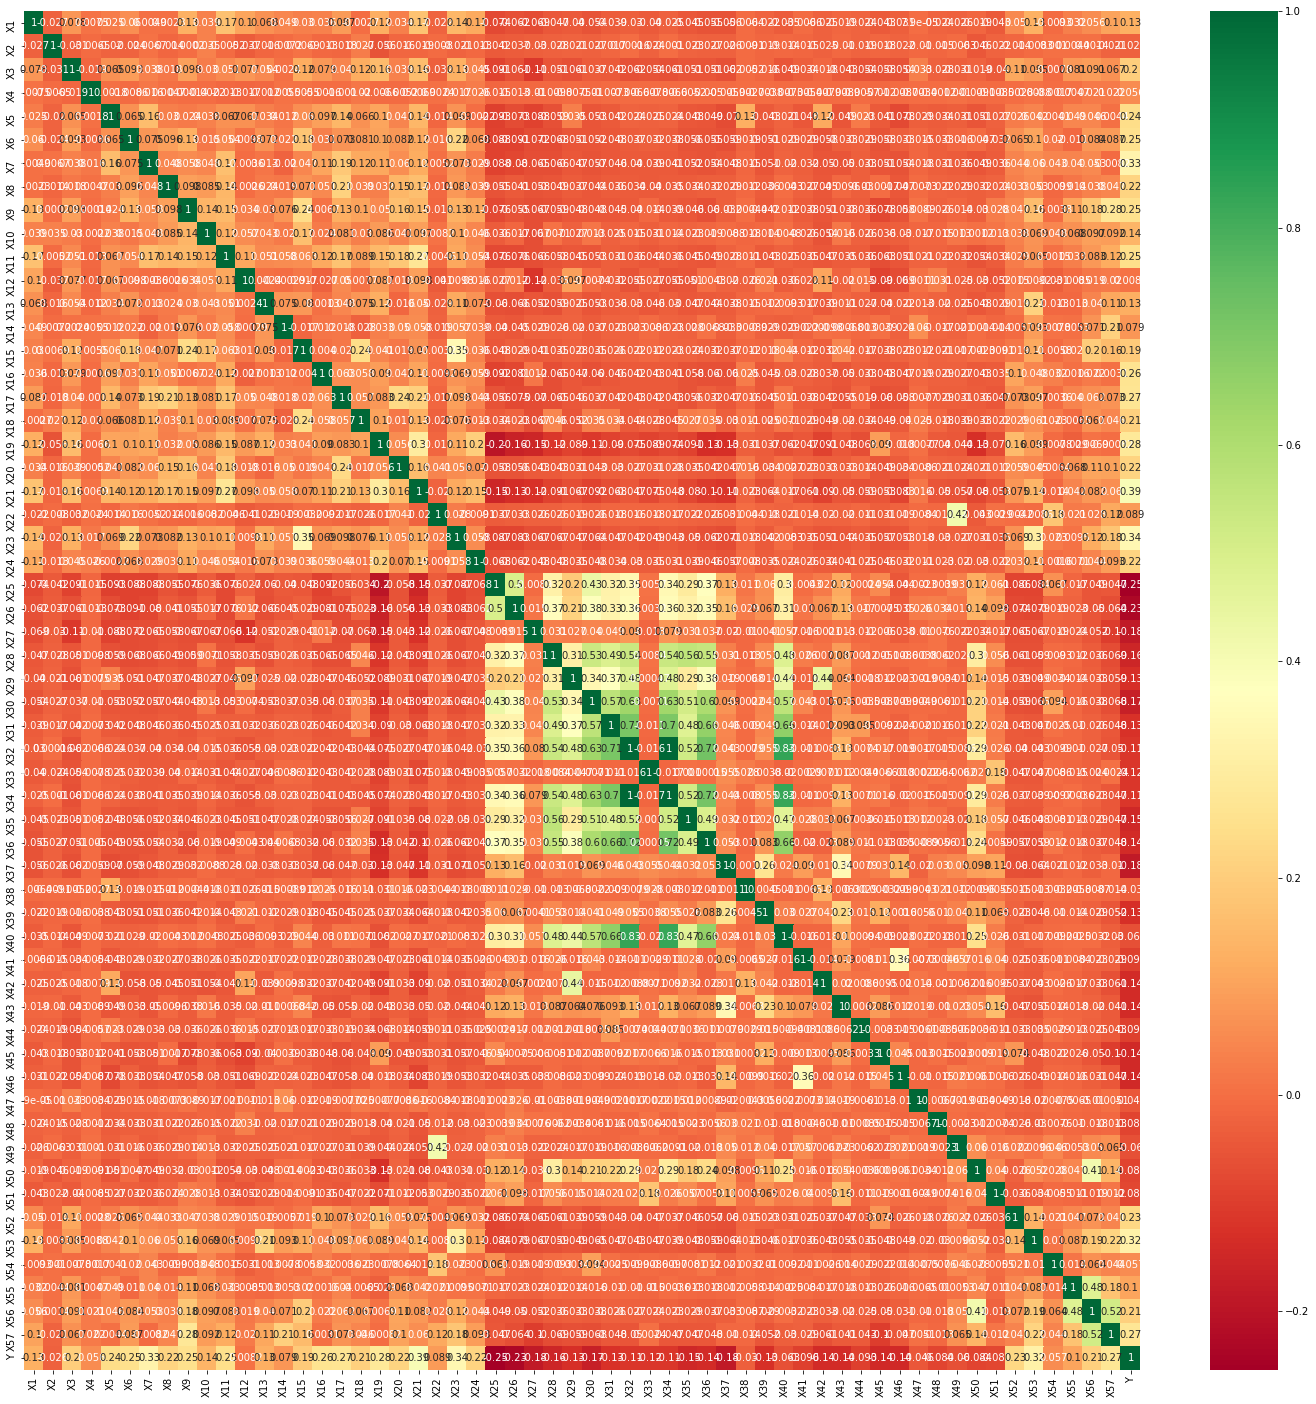

In [15]:
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25, 25))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

We can observe that some features such as X40, X32, X34 have high co-relation.

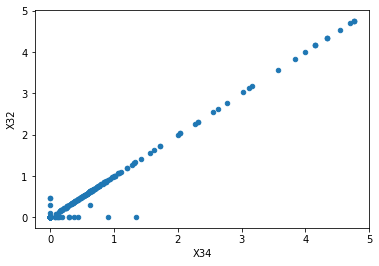

In [16]:
train_df.plot(kind='scatter', x='X34',y='X32')

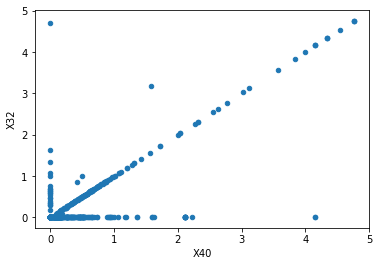

In [17]:
train_df.plot(kind='scatter', x='X40',y='X32')

Thus, we use PCA for dimensionality Reduction.

In [18]:
X = train_df.drop(['Y'], axis=1)
y = train_df['Y']

var_threshold = 0.98  # minimum percentage of variance we want to be described by the resulting transformed components
pca_obj = PCA(n_components=var_threshold) # Create PCA object
X = pca_obj.fit_transform(StandardScaler().fit_transform(X)) # Transform the initial features
columns = ['X' + str(n) for n in range(1, X.shape[1]+1)] #create a list of columns
new_train = pd.DataFrame(X, columns=columns) # Create a data frame from the PCA'd data
new = new_train.copy()
new['Y'] = y #create a full dataframe (including the response) out of the transformed features

X.shape

(3910, 52)

In [19]:
test_df = pca_obj.transform(StandardScaler().fit_transform(test_df)) # Transform the initial features
columns = ['X' + str(n) for n in range(1, test_df.shape[1]+1)] #create a list of columns
new_test = pd.DataFrame(test_df, columns=columns) # Create a data frame from the PCA'd data

new_test.shape

(691, 52)

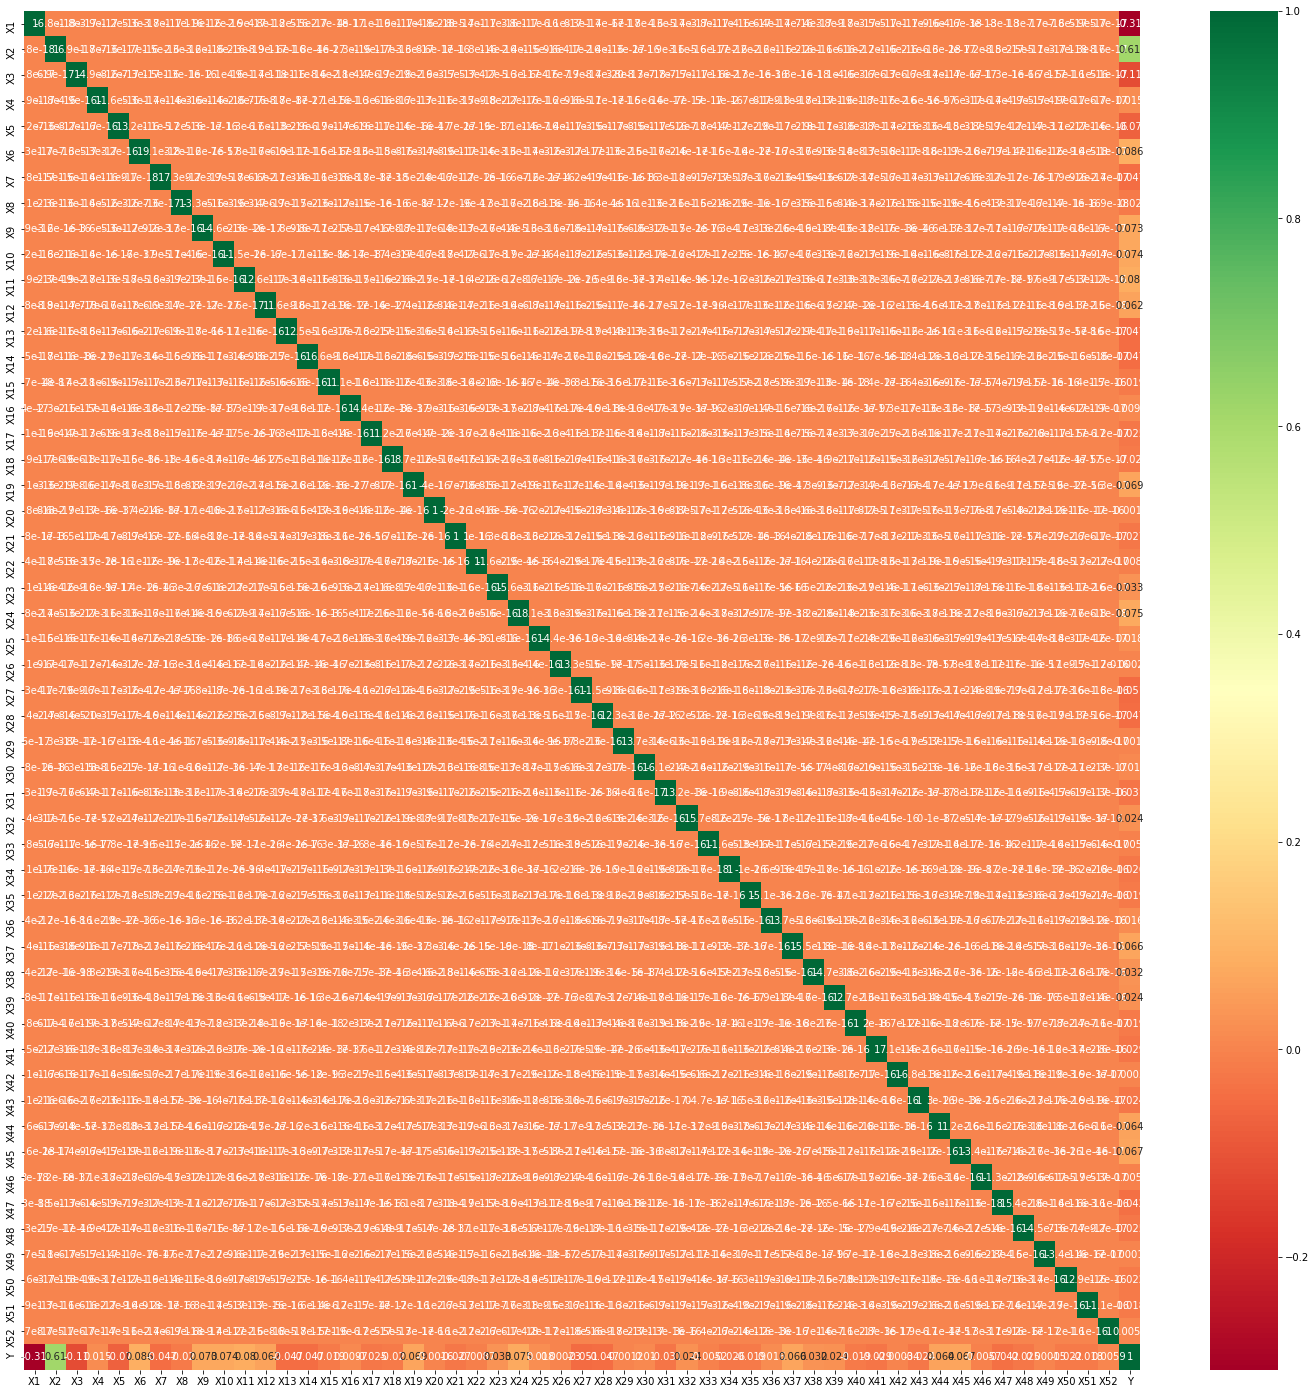

In [20]:
corrmat = new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25, 25))

g=sns.heatmap(new[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Now the heatmap shows no correlation among features

## 5. Feature Importance

In [21]:
y = new[['Y']]
X = new.drop(['Y'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Feature Importance')

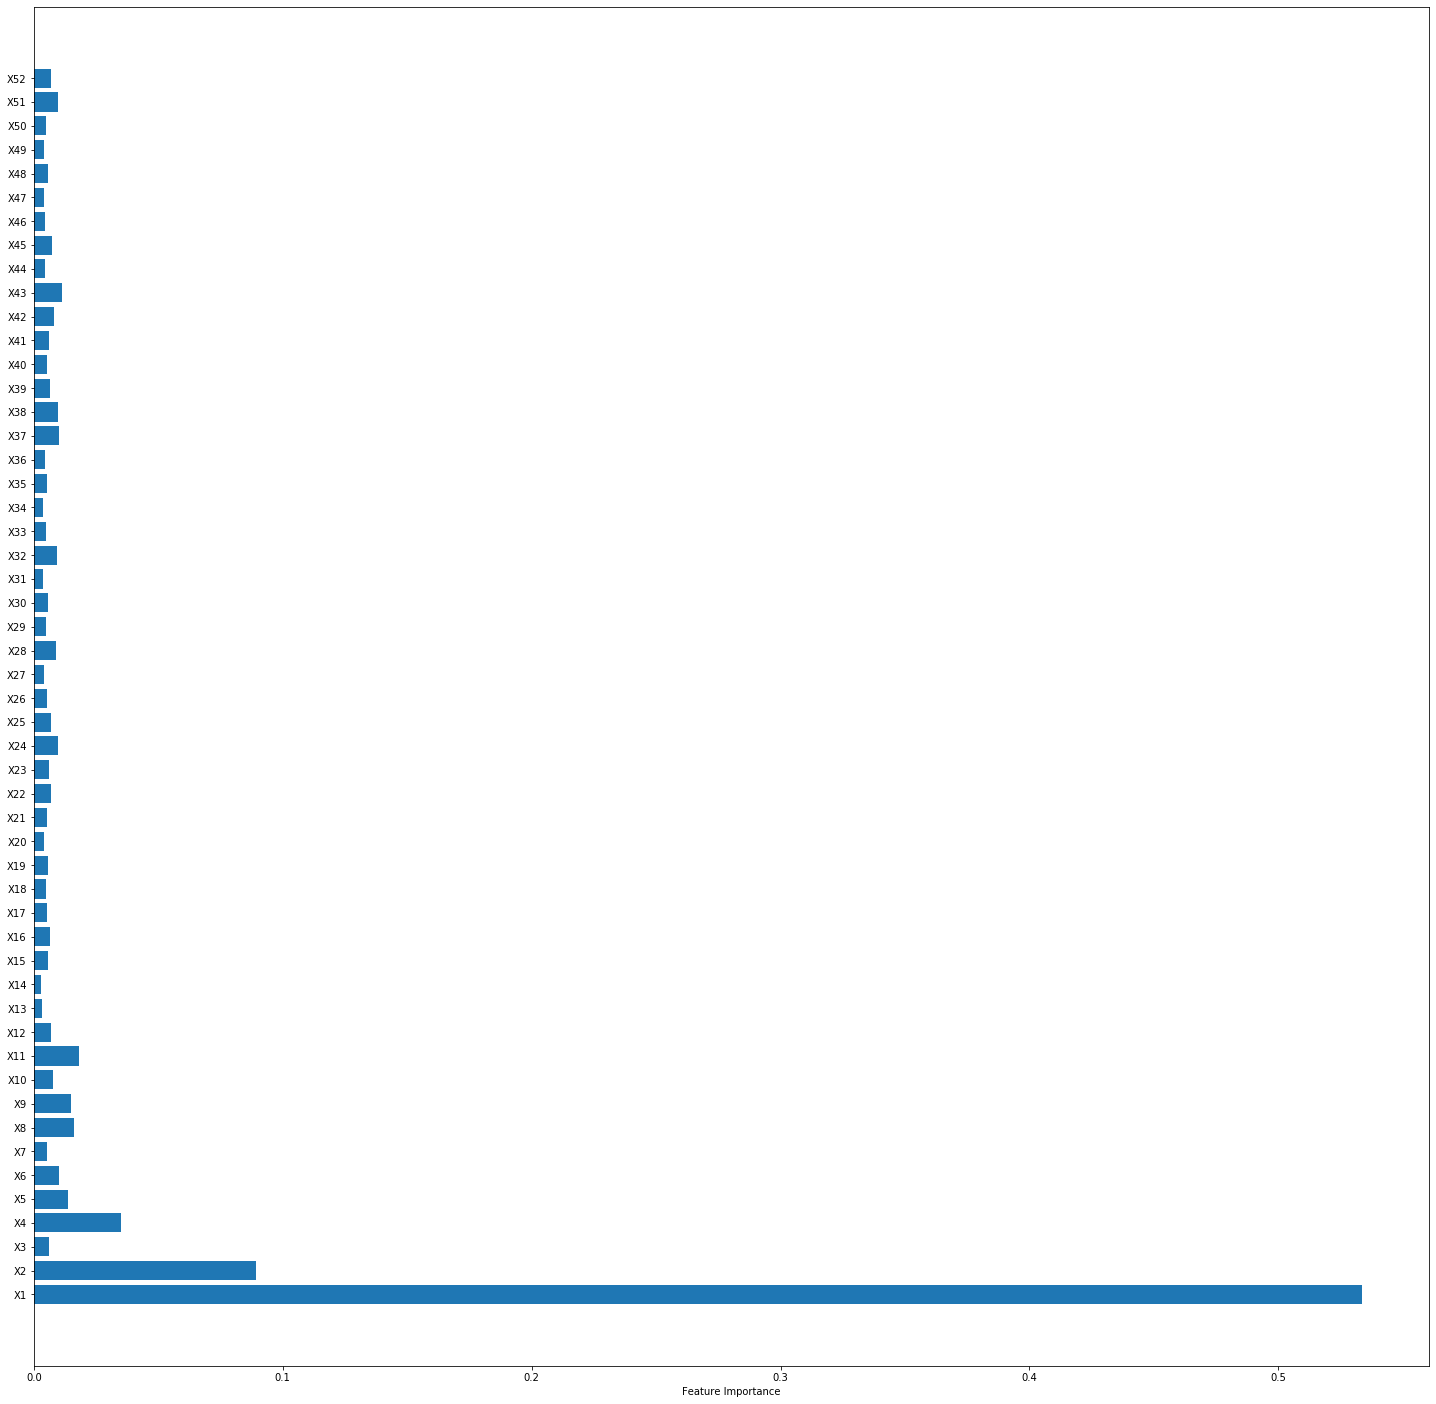

In [23]:
plt.figure(figsize=(25, 25))
plt.barh(X.columns.values, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [24]:
imp_features = len(np.where(rf.feature_importances_ >= 0.005)[0])
print(f'Total features having feature importance greater than 0.005 are {imp_features}')

Total features having feature importance greater than 0.005 are 37


In [25]:
non_imp_feat = ['X' + str(i+1) for i in np.where(rf.feature_importances_ < 0.005)[0]]
new_train = new_train.drop(np.array(non_imp_feat), axis = 1)
new_train.shape

(3910, 37)

In [26]:
new_test = new_test.drop(np.array(non_imp_feat), axis = 1)
new_test.shape

(691, 37)

In [27]:
new_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X38,X39,X40,X41,X42,X43,X45,X48,X51,X52
0,-0.831315,0.022215,-0.519667,0.208198,-0.247308,-1.350358,-0.493992,0.575591,0.786111,1.751898,...,-0.867483,0.527474,-0.477897,0.793950,-0.889015,-1.143789,0.350365,0.196859,-0.543170,-0.154612
1,-1.171020,1.374224,-1.111791,0.179041,0.003749,0.724177,-0.233576,-0.487417,2.392249,1.731376,...,0.099740,-0.394937,-0.510370,-0.377031,-0.695173,0.888663,0.855606,-0.165883,0.010262,0.104395
2,-0.696045,-0.966626,-1.225966,-0.305717,-1.032375,-0.308169,0.125479,1.366989,-0.417236,1.453647,...,0.454356,-0.275893,-0.113215,0.627119,0.870331,1.147443,-1.685534,0.656531,0.145111,0.156033
3,-1.264194,1.580005,-1.507908,0.035343,0.780090,-0.090576,-0.514917,0.837732,0.175249,0.272971,...,-0.080927,0.051120,-0.005810,0.247074,-0.175983,0.035898,0.367099,-0.299634,0.020961,0.004807
4,-1.231796,1.467166,-0.460981,0.854093,-0.618196,0.126474,1.038491,-0.179673,-0.602717,-0.367940,...,-1.388261,-0.624825,-0.117203,0.237069,-0.845608,0.347694,0.094184,0.508277,-0.019907,-0.096420


In [28]:
new_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X38,X39,X40,X41,X42,X43,X45,X48,X51,X52
0,-0.655735,-0.987448,-0.321119,-0.443326,-0.889702,-0.542308,0.381848,1.561228,0.197923,-0.000964,...,0.484892,-0.242066,0.376540,0.589387,-0.832411,0.566069,0.006876,0.130492,0.029442,-0.176128
1,-0.958460,1.352722,-0.135911,0.267459,-0.315049,-0.687761,0.213506,1.270398,0.191762,1.321625,...,-0.409282,0.948151,-0.713626,-0.736712,-0.309633,0.144742,0.865751,-0.343250,0.275847,-0.047449
2,-1.851698,4.610764,1.906133,-0.038941,-0.134520,-1.608925,-0.359943,1.102641,-2.570881,-1.357227,...,-0.197656,-0.249120,0.074575,1.018024,0.337672,-0.036447,-0.039460,-0.214839,-0.077642,-0.030801
3,-1.629258,5.057998,3.232667,-0.993880,0.336266,-2.400104,-1.507352,-1.924485,2.308345,0.333929,...,0.020287,0.889655,-0.744034,-0.303596,0.228299,-0.125864,0.235367,1.267803,0.551557,-0.159791
4,-0.802439,0.697759,-0.388701,0.255556,-0.375766,-0.620395,0.092274,0.863771,0.051492,0.922927,...,-0.311690,0.828067,-0.668965,-0.734776,-0.418318,-0.224334,0.904963,-0.337599,0.133960,-0.089115
